# 01 - EXPLORACIÓN Y PREPROCESAMIENTO DE DATOS

Cargar el dataset, realizar análisis exploratorio, aplicar submuestreo, codificación y preprocesamiento, luego guardar los sets de entrenamiento y prueba para los modelos posteriores.

## Librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import kagglehub
import pickle
import os

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

## Carga del Dataset

In [ ]:
path = kagglehub.dataset_download("amanalisiddiqui/fraud-detection-dataset")
for fil in os.listdir(path):
    print(fil)

data_completa = pd.read_csv(os.path.join(path, "AIML Dataset.csv"))
print(f"Dataset original: {data_completa.shape}")
data_completa.head()

Using Colab cache for faster access to the 'fraud-detection-dataset' dataset.
AIML Dataset.csv
Dataset original: (6362620, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## Análisis Exploratorio

In [ ]:
data_completa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
data_completa.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
print("Valores faltantes:")
print(data_completa.isnull().sum())
print(f"\nDuplicados: {data_completa.duplicated().sum()}")

Valores faltantes:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Duplicados: 0


In [ ]:
print("Tipos de transacción:")
print(data_completa['type'].value_counts())
print(f"\nFraude: {data_completa['isFraud'].value_counts().to_dict()}")
print(f"Porcentaje de fraude: {(data_completa['isFraud'].sum() / len(data_completa) * 100):.4f}%")

Tipos de transacción:
type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

Fraude: {0: 6354407, 1: 8213}
Porcentaje de fraude: 0.1291%


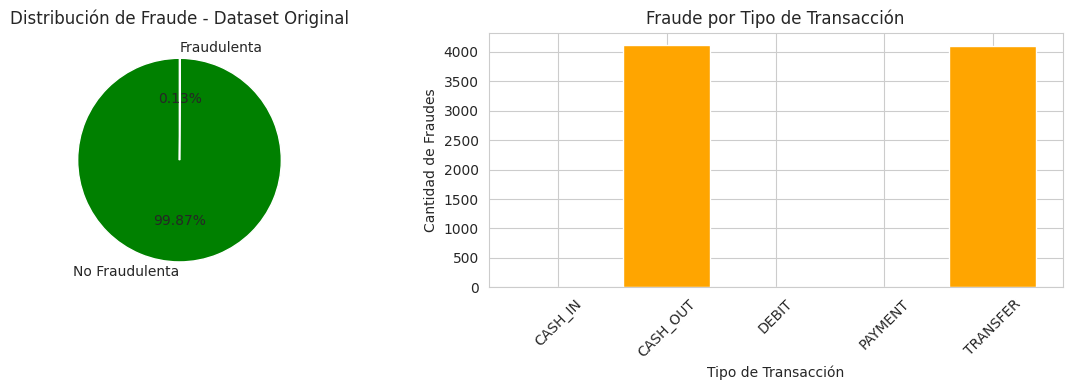

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

fraud_counts = data_completa['isFraud'].value_counts()
axes[0].pie(fraud_counts, labels=['No Fraudulenta', 'Fraudulenta'], autopct='%1.2f%%',
            startangle=90, colors=['green', 'red'])
axes[0].set_title('Distribución de Fraude - Dataset Original')

fraud_by_type = data_completa.groupby('type')['isFraud'].sum()
axes[1].bar(fraud_by_type.index, fraud_by_type.values, color='orange')
axes[1].set_title('Fraude por Tipo de Transacción')
axes[1].set_xlabel('Tipo de Transacción')
axes[1].set_ylabel('Cantidad de Fraudes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##  Submuestreo (Random Undersampling)

In [ ]:
fraud_data = data_completa[data_completa['isFraud'] == 1]
non_fraud_data = data_completa[data_completa['isFraud'] == 0]

fraud_sample = fraud_data.sample(n=200, random_state=42)
non_fraud_sample = non_fraud_data.sample(n=19800, random_state=42)

data = pd.concat([fraud_sample, non_fraud_sample]).sample(frac=1, random_state=42)

print(f"Dataset submuestreado: {data.shape}")
print(f"Distribución: {data['isFraud'].value_counts().to_dict()}")
print(f"Porcentaje fraude: {(data['isFraud'].sum() / len(data) * 100):.2f}%")

Dataset submuestreado: (20000, 11)
Distribución: {0: 19800, 1: 200}
Porcentaje fraude: 1.00%


## Matriz de Correlación

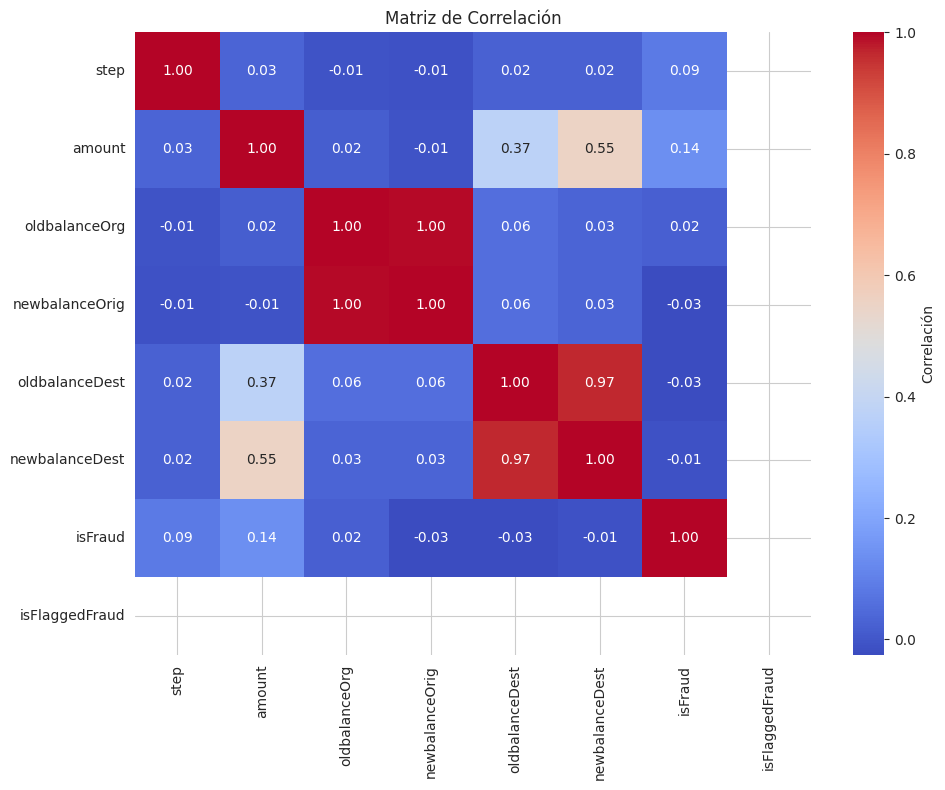

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm',
            fmt='.2f', cbar_kws={'label': 'Correlación'})
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

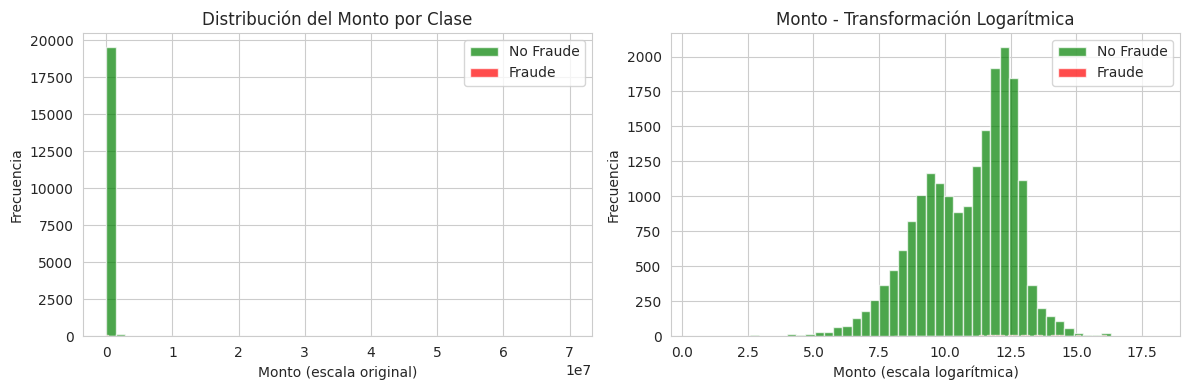

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(data[data['isFraud'] == 0]['amount'], bins=50, alpha=0.7, label='No Fraude', color='green')
axes[0].hist(data[data['isFraud'] == 1]['amount'], bins=50, alpha=0.7, label='Fraude', color='red')
axes[0].set_xlabel('Monto (escala original)')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución del Monto por Clase')
axes[0].legend()

data_log_amount = np.log1p(data['amount'])
axes[1].hist(data_log_amount[data['isFraud'] == 0], bins=50, alpha=0.7, label='No Fraude', color='green')
axes[1].hist(data_log_amount[data['isFraud'] == 1], bins=50, alpha=0.7, label='Fraude', color='red')
axes[1].set_xlabel('Monto (escala logarítmica)')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Monto - Transformación Logarítmica')
axes[1].legend()
plt.tight_layout()
plt.show()

## Codificación de Variables

In [ ]:
data_encoded = pd.get_dummies(data, columns=['type'], prefix='type', drop_first=False)

le_orig = LabelEncoder()
le_dest = LabelEncoder()

data_encoded['nameOrig_encoded'] = le_orig.fit_transform(data_encoded['nameOrig'])
data_encoded['nameDest_encoded'] = le_dest.fit_transform(data_encoded['nameDest'])

data_encoded = data_encoded.drop(['nameOrig', 'nameDest'], axis=1)

print(f"Variables después de codificación: {data_encoded.shape[1]}")
print(f"Forma: {data_encoded.shape}")

Variables después de codificación: 15
Forma: (20000, 15)


## Transformación y Normalización

In [ ]:
data_encoded['amount'] = np.log1p(data_encoded['amount'])

variables_to_scale = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
                      'oldbalanceDest', 'newbalanceDest', 'nameOrig_encoded', 'nameDest_encoded']

scaler = StandardScaler()

data_scaled = data_encoded.copy()
data_scaled[variables_to_scale] = scaler.fit_transform(data_encoded[variables_to_scale])

print("Datos normalizados (muestra):")
print(data_scaled[variables_to_scale].describe())

Datos normalizados (muestra):
               step        amount  oldbalanceOrg  newbalanceOrig  \
count  2.000000e+04  2.000000e+04   20000.000000    2.000000e+04   
mean  -2.877698e-17  2.135181e-16       0.000000    4.263256e-17   
std    1.000025e+00  1.000025e+00       1.000025    1.000025e+00   
min   -1.692389e+00 -5.693639e+00      -0.290692   -2.917577e-01   
25%   -6.251578e-01 -7.338378e-01      -0.290692   -2.917577e-01   
50%    2.626878e-02  2.083521e-01      -0.285602   -2.917577e-01   
75%    6.984856e-01  7.657754e-01      -0.252566   -2.436016e-01   
max    3.408143e+00  3.938568e+00      11.280584    1.119092e+01   

       oldbalanceDest  newbalanceDest  nameOrig_encoded  nameDest_encoded  
count    2.000000e+04    2.000000e+04      2.000000e+04      2.000000e+04  
mean     1.865175e-17   -8.526513e-17     -2.131628e-18     -5.968559e-17  
std      1.000025e+00    1.000025e+00      1.000025e+00      1.000025e+00  
min     -3.221438e-01   -3.211800e-01     -1.731964e+

## División Train/Test

In [ ]:
X = data_scaled.drop(['isFraud', 'isFlaggedFraud'], axis=1)
y = data_scaled['isFraud']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

print(f"\nFragmentación train: {y_train.value_counts().to_dict()}")
print(f"Fragmentación test: {y_test.value_counts().to_dict()}")

X_train: (16000, 13)
X_test: (4000, 13)
y_train: (16000,)
y_test: (4000,)

Fragmentación train: {0: 15840, 1: 160}
Fragmentación test: {0: 3960, 1: 40}


In [16]:
data_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 886177 to 1862940
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   step              20000 non-null  float64
 1   amount            20000 non-null  float64
 2   oldbalanceOrg     20000 non-null  float64
 3   newbalanceOrig    20000 non-null  float64
 4   oldbalanceDest    20000 non-null  float64
 5   newbalanceDest    20000 non-null  float64
 6   isFraud           20000 non-null  int64  
 7   isFlaggedFraud    20000 non-null  int64  
 8   type_CASH_IN      20000 non-null  bool   
 9   type_CASH_OUT     20000 non-null  bool   
 10  type_DEBIT        20000 non-null  bool   
 11  type_PAYMENT      20000 non-null  bool   
 12  type_TRANSFER     20000 non-null  bool   
 13  nameOrig_encoded  20000 non-null  float64
 14  nameDest_encoded  20000 non-null  float64
dtypes: bool(5), float64(8), int64(2)
memory usage: 1.8 MB


In [18]:
data_scaled.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,nameOrig_encoded,nameDest_encoded
886177,-1.408256,0.813086,-0.284858,-0.291758,-0.168611,-0.124561,0,0,False,False,False,False,True,1.256343,-1.227841
5691218,1.051919,-0.956639,-0.290692,-0.291758,-0.322144,-0.321180,0,0,False,False,False,True,False,-0.402788,1.070644
4434358,0.539094,0.962444,-0.290692,-0.291758,-0.124703,-0.066668,0,0,False,True,False,False,False,0.989607,-0.549678
2425931,-0.299445,0.843580,0.917019,0.990654,-0.222779,-0.296445,0,0,True,False,False,False,False,0.335412,-0.104274
6143872,2.077569,0.684698,-0.290644,-0.291758,-0.240002,-0.200592,0,0,False,True,False,False,False,-0.423400,0.373422


## Guardando Datos Procesados

In [ ]:
output_dir = 'data/processed'
os.makedirs(output_dir, exist_ok=True)

data_dict = {
    'X_train': X_train,
    'X_test': X_test,
    'y_train': y_train,
    'y_test': y_test,
    'feature_names': X.columns.tolist(),
    'scaler': scaler,
    'le_orig': le_orig,
    'le_dest': le_dest
}

with open(os.path.join(output_dir, 'dataset_procesado.pkl'), 'wb') as f:
    pickle.dump(data_dict, f)

X_train.to_csv(os.path.join(output_dir, 'X_train.csv'), index=False)
X_test.to_csv(os.path.join(output_dir, 'X_test.csv'), index=False)
y_train.to_csv(os.path.join(output_dir, 'y_train.csv'), index=False)
y_test.to_csv(os.path.join(output_dir, 'y_test.csv'), index=False)

print(f"Datos guardados en: {output_dir}")

Datos guardados en: data/processed
